In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1. Since age has about 177 null values and Embarked has about 2 null values lets drop it

In [6]:
df.dropna(subset=['Age', 'Embarked'], inplace = True)

In [7]:
print(df.Age.isna().sum())
print(df.Embarked.isna().sum())

0
0


In [8]:
df.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
885    Q
886    S
887    S
889    C
890    Q
Name: Embarked, Length: 712, dtype: object

## Encoding:
1. Label encoding: Sex
2. Hot encoding: Embarked 

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    int32  
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 69.5+ KB


In [11]:
df['Embarked'] = df['Embarked'].astype('category')

In [12]:
emb_dummy = pd.get_dummies(df.Embarked)
emb_dummy = emb_dummy.astype(int)
df.reset_index(drop = True, inplace = True)
emb_dummy.reset_index(drop=True, inplace=True)
df = pd.concat([df, emb_dummy], axis=1)  
df.drop(columns=['Embarked'], inplace=True)

2. Now the feature Cabin has about 687 null values, which is a significant number so instead of dropping the values, we will first check how significantly is it correlated to the target and on that we will either replace it with mean or median.

3. For Correlation we will use heatmap

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
r_df = df.drop(columns = ['Name', 'Ticket', 'Cabin'], axis = 1)

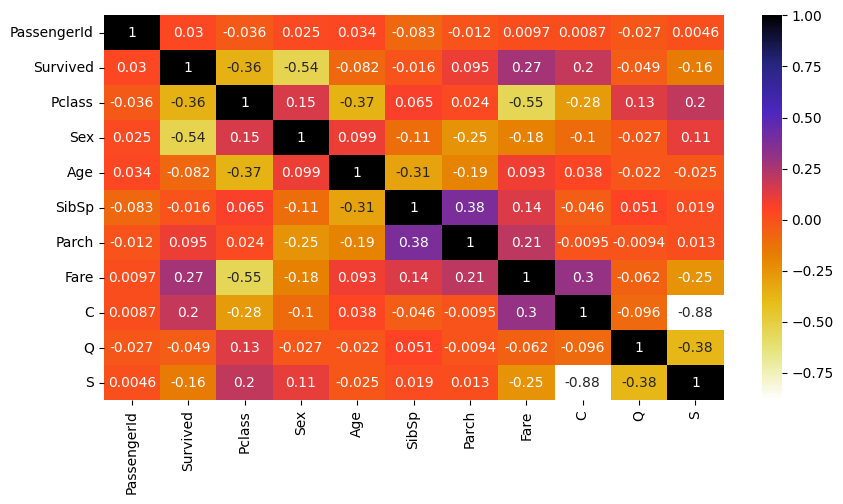

In [14]:
plt.figure(figsize = (10, 5))
r = r_df.corr()
sns.heatmap(r, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

From the above analysis we get:
1. Survival(Target) is highly correlated to: Pclass, Sex.
2. Pclass and Fare are highy correlated so we can use either of them, but since our dataset is small well consider both.
3. Sibsp and Parch are significantly correlated, so we can use either of them, but since our dataset is small well consider both.

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(['Survived','PassengerId', 'Name', 'Age', 'Ticket', 'Cabin'], axis = 1)
y = df.Survived

In [17]:
X

,Pclass,Sex,SibSp,Parch,Fare,C,Q,S
0,3,1,1,0,7.2500,0,0,1
1,1,0,1,0,71.2833,1,0,0
2,3,0,0,0,7.9250,0,0,1
3,1,0,1,0,53.1000,0,0,1
4,3,1,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...
707,3,0,0,5,29.1250,0,1,0
708,2,1,0,0,13.0000,0,0,1
709,1,0,0,0,30.0000,0,0,1
710,1,1,0,0,30.0000,1,0,0


In [18]:
y

0      0
1      1
2      1
3      1
4      0
      ..
707    0
708    0
709    1
710    1
711    0
Name: Survived, Length: 712, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(len(X_train))
print(len(X_test))

569
143


In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train

array([[-0.28934006, -1.31741297,  0.52133471, ..., -0.45614465,
        -0.18074257,  0.50603423],
       [-0.28934006, -1.31741297,  0.52133471, ..., -0.45614465,
        -0.18074257,  0.50603423],
       [-0.28934006,  0.75906343, -0.54956583, ..., -0.45614465,
        -0.18074257,  0.50603423],
       ...,
       [ 0.91237159,  0.75906343, -0.54956583, ..., -0.45614465,
        -0.18074257,  0.50603423],
       [-0.28934006,  0.75906343,  0.52133471, ..., -0.45614465,
        -0.18074257,  0.50603423],
       [ 0.91237159,  0.75906343, -0.54956583, ..., -0.45614465,
        -0.18074257,  0.50603423]])

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7, )
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [23]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.7762237762237763

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        80
           1       0.80      0.65      0.72        63

    accuracy                           0.78       143
   macro avg       0.78      0.76      0.77       143
weighted avg       0.78      0.78      0.77       143

[[70 10]
 [22 41]]


In [25]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

correct_predictions = (results_df['Actual'] == results_df['Predicted']).sum()
wrong_predictions = (results_df['Actual'] != results_df['Predicted']).sum()
print("Total Values", len(y_test))
print("Total number of correct predictions:", correct_predictions)
print("Total number of wrong predictions:", wrong_predictions)
results_df.head()

Total Values 143
Total number of correct predictions: 111
Total number of wrong predictions: 32


,Actual,Predicted
506,1,1
394,1,1
210,0,0
247,1,1
437,0,0


In [26]:
correct_predictions = (results_df['Actual'] == results_df['Predicted']).sum()
wrong_predictions = (results_df['Actual'] != results_df['Predicted']).sum()
print("Total Values:", len(y_test))
print("Total number of correct predictions:", correct_predictions)
print("Total number of wrong predictions:", wrong_predictions)
results_df.head()

Total Values: 143
Total number of correct predictions: 111
Total number of wrong predictions: 32


,Actual,Predicted
506,1,1
394,1,1
210,0,0
247,1,1
437,0,0


In [27]:
import joblib
joblib.dump(model, 'diabetesModel.pkl')
joblib.dump(scaler, 'scaler.pkl')       

['scaler.pkl']